In [73]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='episode', ylabel='duration'>

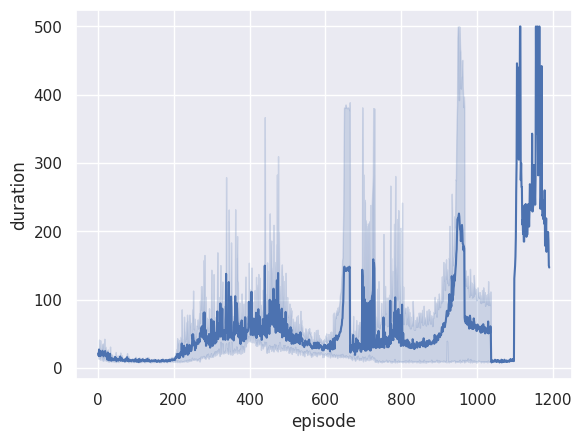

In [70]:
df1 = pd.read_csv("mem_dqn_carpolev1_2.csv").reset_index()
df1['Buffer'] = 'Memory'
sns.lineplot(df1, x='episode', y='duration')

<Axes: xlabel='episode', ylabel='duration'>

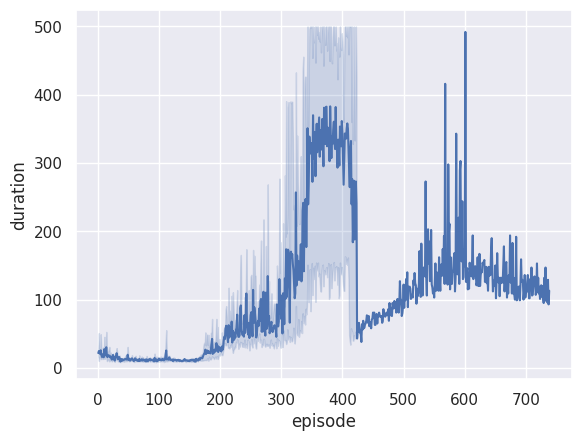

In [71]:
df2 = pd.read_csv("per_dqn_carpolev1_2.csv").reset_index()
df2['Buffer'] = 'PER'
sns.lineplot(df2, x='episode', y='duration')

<Axes: xlabel='episode', ylabel='duration'>

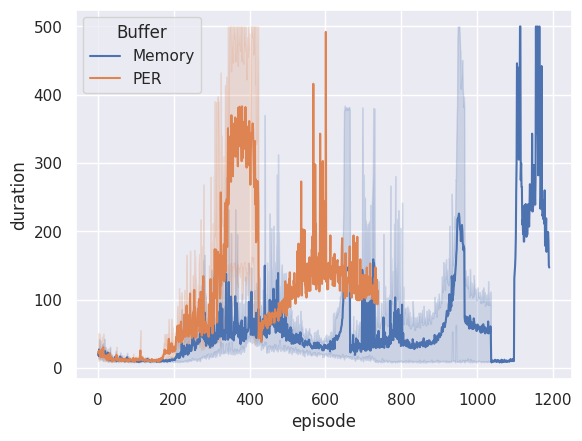

In [72]:
df = pd.concat([df1, df2])
sns.lineplot(df, x='episode', y='duration', hue='Buffer')

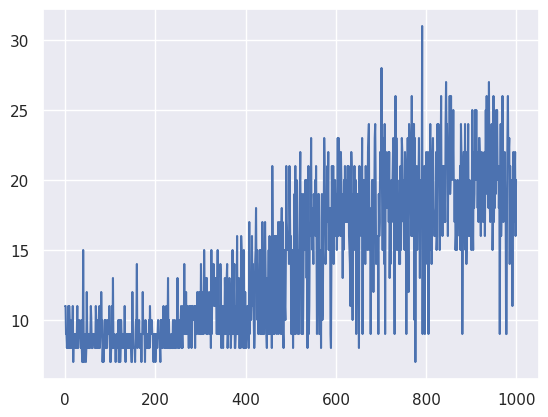

In [75]:
plt.plot(x)

<Axes: xlabel='episode', ylabel='duration'>

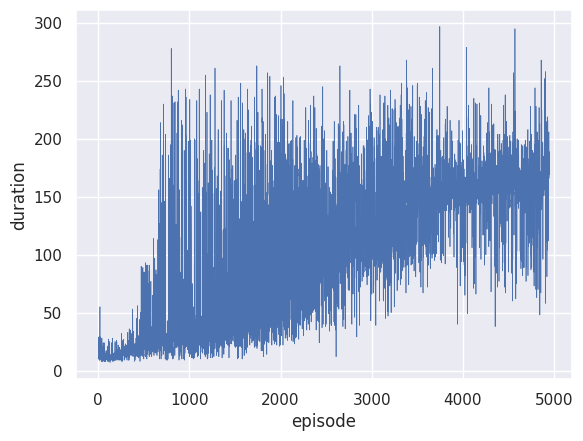

In [142]:
df = pd.read_csv('no_frill_dqn.csv')
sns.lineplot(df, x='episode',y='duration',linewidth=.5)

In [147]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class DQN(nn.Module):
    def __init__(self, n_observations, n_actions):
        super(DQN, self).__init__()
        self.layer1 = nn.Linear(n_observations, 32)
        self.layer2 = nn.Linear(32, 32)
        self.layer3 = nn.Linear(32, n_actions)

    # Called with either one element to determine next action, or a batch
    # during optimization. Returns tensor([[left0exp,right0exp]...]).
    def forward(self, x):
        x = F.silu(self.layer1(x))
        x = F.silu(self.layer2(x))
        return self.layer3(x)

<Axes: xlabel='episode', ylabel='duration'>

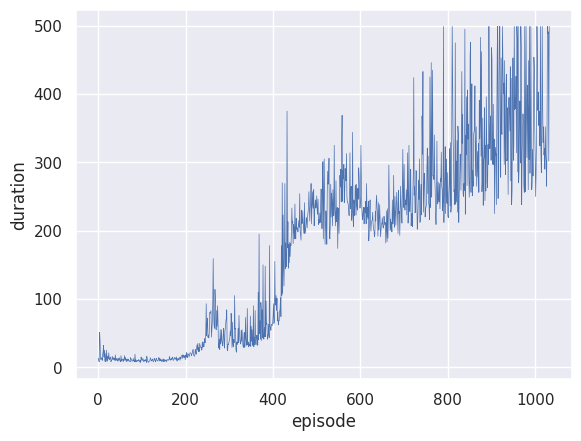

In [265]:
df = pd.read_csv('no_frill_doubledqn.csv')
sns.lineplot(df, x='episode',y='duration',linewidth=.5)

In [148]:
model = DQN(4, 2)
model

DQN(
  (layer1): Linear(in_features=4, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=2, bias=True)
)

In [162]:
test_batch = torch.rand(64,4, dtype=torch.float32)
test_batch

tensor([[0.9367, 0.2805, 0.6380, 0.3210],
        [0.4229, 0.4517, 0.9706, 0.9125],
        [0.3944, 0.3167, 0.3517, 0.0459],
        [0.7770, 0.9258, 0.7454, 0.3066],
        [0.7266, 0.4909, 0.1107, 0.8024],
        [0.8035, 0.0057, 0.1156, 0.5520],
        [0.3723, 0.4748, 0.8845, 0.1963],
        [0.8808, 0.1899, 0.9430, 0.9140],
        [0.3045, 0.1205, 0.1919, 0.0030],
        [0.8077, 0.2323, 0.7756, 0.9075],
        [0.4370, 0.8420, 0.2104, 0.7047],
        [0.4442, 0.2912, 0.2244, 0.7462],
        [0.3306, 0.1893, 0.3428, 0.0533],
        [0.2941, 0.4618, 0.4512, 0.9120],
        [0.7258, 0.8161, 0.0526, 0.9079],
        [0.2174, 0.3884, 0.3356, 0.5263],
        [0.5324, 0.4741, 0.1766, 0.5458],
        [0.2262, 0.0835, 0.0637, 0.4726],
        [0.5488, 0.2563, 0.7625, 0.2290],
        [0.9539, 0.4252, 0.1271, 0.8858],
        [0.4062, 0.1132, 0.5908, 0.6993],
        [0.2730, 0.9330, 0.8738, 0.7153],
        [0.0550, 0.6917, 0.1055, 0.9172],
        [0.3090, 0.0366, 0.8402, 0

In [163]:
model(test_batch)

tensor([[0.1306, 0.1532],
        [0.1050, 0.1577],
        [0.1526, 0.1757],
        [0.1370, 0.1711],
        [0.1453, 0.1667],
        [0.1399, 0.1585],
        [0.1278, 0.1702],
        [0.1026, 0.1458],
        [0.1569, 0.1769],
        [0.1107, 0.1493],
        [0.1522, 0.1811],
        [0.1410, 0.1677],
        [0.1510, 0.1743],
        [0.1310, 0.1682],
        [0.1514, 0.1742],
        [0.1449, 0.1751],
        [0.1500, 0.1722],
        [0.1518, 0.1750],
        [0.1291, 0.1617],
        [0.1392, 0.1594],
        [0.1240, 0.1598],
        [0.1204, 0.1748],
        [0.1525, 0.1867],
        [0.1203, 0.1610],
        [0.1529, 0.1775],
        [0.1298, 0.1592],
        [0.1210, 0.1744],
        [0.1555, 0.1802],
        [0.1318, 0.1553],
        [0.1489, 0.1664],
        [0.1285, 0.1568],
        [0.1395, 0.1672],
        [0.1552, 0.1688],
        [0.1511, 0.1837],
        [0.1341, 0.1664],
        [0.1696, 0.2040],
        [0.1213, 0.1658],
        [0.1442, 0.1788],
        [0.1

In [173]:
model(test_batch).max(1)[0]

tensor([0.1532, 0.1577, 0.1757, 0.1711, 0.1667, 0.1585, 0.1702, 0.1458, 0.1769,
        0.1493, 0.1811, 0.1677, 0.1743, 0.1682, 0.1742, 0.1751, 0.1722, 0.1750,
        0.1617, 0.1594, 0.1598, 0.1748, 0.1867, 0.1610, 0.1775, 0.1592, 0.1744,
        0.1802, 0.1553, 0.1664, 0.1568, 0.1672, 0.1688, 0.1837, 0.1664, 0.2040,
        0.1658, 0.1788, 0.1559, 0.1692, 0.1655, 0.1834, 0.1672, 0.1593, 0.1887,
        0.1824, 0.1645, 0.1732, 0.1738, 0.1682, 0.1667, 0.1567, 0.1676, 0.1560,
        0.1590, 0.1604, 0.1805, 0.1850, 0.1792, 0.1579, 0.1885, 0.1631, 0.1622,
        0.1664], grad_fn=<MaxBackward0>)

In [176]:
test_state = torch.rand(1,4, dtype=torch.float32)
print(model(test_state)) # ex: tensor([[-0.1439,  0.0479]], device='cuda:1')
print(model(test_state).max(1)) # ex: values=tensor([0.0479], device='cuda:1'),
print(model(test_state).max(1)[1].view(1, 1)) # ex: indices=tensor([1], device='cuda:1'))

tensor([[0.1285, 0.1585]], grad_fn=<AddmmBackward0>)
torch.return_types.max(
values=tensor([0.1585], grad_fn=<MaxBackward0>),
indices=tensor([1]))
tensor([[1]])
